In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"christy0209","key":"e94d173d6a25659516ae846b2ba5cf28"}'}

In [5]:
! mkdir  ~/.kaggle

In [6]:
! mv kaggle.json ~/.kaggle

In [7]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                       179MB  2020-05-21 18:57:53          16607  
mrgeislinger/bart-ridership                                 BART Ridership                                   325MB  2020-07-09 22:28:07             57  
vishnuvarthanrao/windows-store                              Windows Store                                     93KB  2020-07-07 12:29:07            351  
vzrenggamani/hanacaraka                                     Aksara Jawa / Hanacaraka                           9MB  2020-07-10 15:09:31             14  
mrmorj/restaurant-recommendation-challenge                  Restaurant Recommendat

In [9]:
!kaggle datasets download -d puneet6060/intel-image-classification

 94% 324M/346M [00:04<00:00, 52.1MB/s]
100% 346M/346M [00:04<00:00, 82.9MB/s]


In [10]:
!ls

drive  intel-image-classification.zip  sample_data


In [11]:
!mkdir intel

In [12]:
! unzip intel-image-classification.zip -d intel

Streaming output truncated to the last 5000 lines.
  inflating: intel/seg_train/seg_train/mountain/7537.jpg  
  inflating: intel/seg_train/seg_train/mountain/7539.jpg  
  inflating: intel/seg_train/seg_train/mountain/7551.jpg  
  inflating: intel/seg_train/seg_train/mountain/7560.jpg  
  inflating: intel/seg_train/seg_train/mountain/7565.jpg  
  inflating: intel/seg_train/seg_train/mountain/7578.jpg  
  inflating: intel/seg_train/seg_train/mountain/7581.jpg  
  inflating: intel/seg_train/seg_train/mountain/7586.jpg  
  inflating: intel/seg_train/seg_train/mountain/7647.jpg  
  inflating: intel/seg_train/seg_train/mountain/7652.jpg  
  inflating: intel/seg_train/seg_train/mountain/7654.jpg  
  inflating: intel/seg_train/seg_train/mountain/7662.jpg  
  inflating: intel/seg_train/seg_train/mountain/767.jpg  
  inflating: intel/seg_train/seg_train/mountain/7672.jpg  
  inflating: intel/seg_train/seg_train/mountain/7679.jpg  
  inflating: intel/seg_train/seg_train/mountain/7681.jpg  
  infl

In [13]:
!ls

drive  intel  intel-image-classification.zip  sample_data


In [14]:
!ls ./intel

seg_pred  seg_test  seg_train


In [15]:
!ls ./intel/seg_train/seg_train

buildings  forest  glacier  mountain  sea  street


In [16]:
!ls ./intel/seg_test/seg_test

buildings  forest  glacier  mountain  sea  street


In [17]:
PATH = "./intel/"

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,Softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [19]:
train_dir = os.path.join(PATH,'seg_train/seg_train')
validation_dir = os.path.join(PATH, 'seg_test/seg_test')

In [20]:
train_buildings_dir = os.path.join(train_dir, 'buildings')  # directory with our training daisy pictures
train_forest_dir = os.path.join(train_dir, 'forest')  # directory with our training dandelion pictures
train_glacier_dir = os.path.join(train_dir, 'glacier')  # directory with our training rose pictures
train_mountain_dir = os.path.join(train_dir, 'mountain')  # directory with our training sunflower pictures
train_sea_dir = os.path.join(train_dir, 'sea')  # directory with our training tulip pictures
train_street_dir = os.path.join(train_dir, 'street')


In [21]:
validation_buildings_dir = os.path.join(validation_dir, 'buildings')  # directory with our training daisy pictures
validation_forest_dir = os.path.join(validation_dir, 'forest')  # directory with our training dandelion pictures
validation_glacier_dir = os.path.join(validation_dir, 'glacier')  # directory with our training rose pictures
validation_mountain_dir = os.path.join(validation_dir, 'mountain')  # directory with our training sunflower pictures
validation_sea_dir = os.path.join(validation_dir, 'sea')  # directory with our training tulip pictures
validation_street_dir = os.path.join(validation_dir, 'street')


In [22]:
num_buildings_tr = len(os.listdir(train_buildings_dir))
num_glacier_tr = len(os.listdir(train_glacier_dir))

num_buildings_val = len(os.listdir(validation_buildings_dir))
num_glacier_val = len(os.listdir(validation_glacier_dir))


In [23]:
print('total training rose images:', num_buildings_tr)
print('total training tulip images:', num_glacier_tr)

print('total validation rose images:', num_buildings_val)
print('total validation tulip images:', num_glacier_val)


total training rose images: 2191
total training tulip images: 2404
total validation rose images: 437
total validation tulip images: 553


In [24]:
batch_size = 128
epochs = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [25]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [26]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

Found 14034 images belonging to 6 classes.


In [27]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='sparse')

Found 3000 images belonging to 6 classes.


In [28]:
sample_training_images, _ = next(train_data_gen)

In [29]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

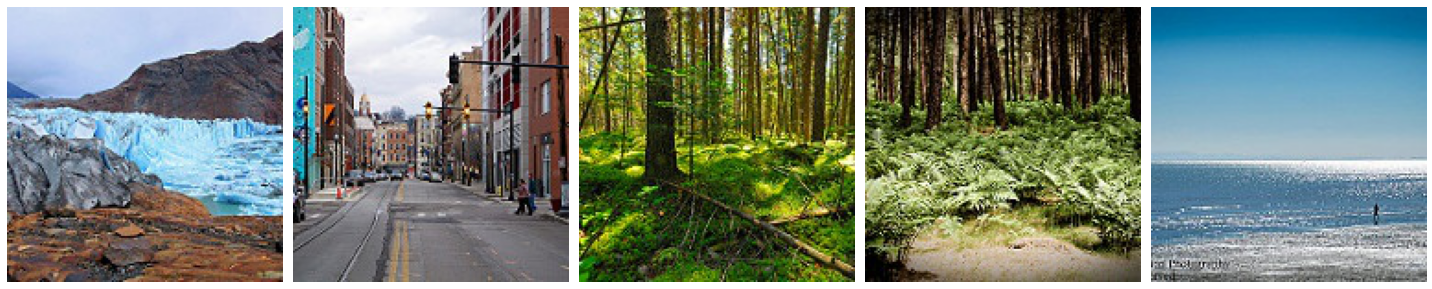

In [30]:
plotImages(sample_training_images[6:11])

In [39]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6,activation='softmax')])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

In [42]:
epochs = 30
history = model.fit(
    train_data_gen,
    steps_per_epoch=14034 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=3000 // batch_size
)

Epoch 1/30
109/109 [==============================] - 19s 174ms/step - loss: 1.6914 - accuracy: 0.3418 - val_loss: 1.5757 - val_accuracy: 0.4643
Epoch 2/30
109/109 [==============================] - 19s 174ms/step - loss: 1.5178 - accuracy: 0.5216 - val_loss: 1.4973 - val_accuracy: 0.5462
Epoch 3/30
109/109 [==============================] - 19s 175ms/step - loss: 1.4782 - accuracy: 0.5620 - val_loss: 1.5001 - val_accuracy: 0.5374
Epoch 4/30
109/109 [==============================] - 19s 177ms/step - loss: 1.4531 - accuracy: 0.5897 - val_loss: 1.4593 - val_accuracy: 0.5849
Epoch 5/30
109/109 [==============================] - 19s 173ms/step - loss: 1.4287 - accuracy: 0.6136 - val_loss: 1.4621 - val_accuracy: 0.5761
Epoch 6/30
109/109 [==============================] - 19s 174ms/step - loss: 1.4214 - accuracy: 0.6205 - val_loss: 1.4569 - val_accuracy: 0.5856
Epoch 7/30
109/109 [==============================] - 19s 174ms/step - loss: 1.4042 - accuracy: 0.6377 - val_loss: 1.4460 - val_ac

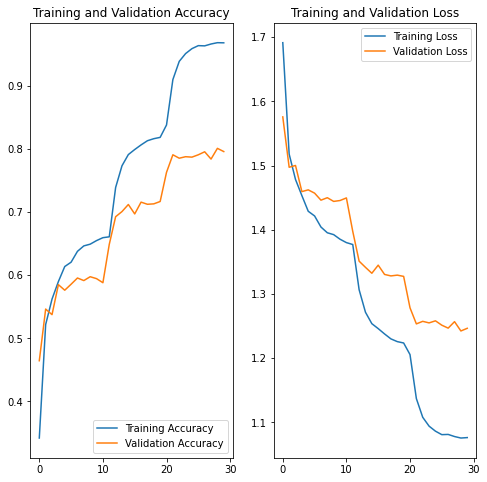

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()